In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Pull in file 
merged_df = pd.read_csv('Resources/merged_data/clean_merge.csv')



merged_df.head()

,FIPS,St,Cnty,NAICS,Year,Area Type,St Name,Area,Industry,Annual Average Employment,Annual Average Pay,Total Wage Location Quotient Relative to U.S.,RegionName,State,Avg_Price
0,1001,1,1.0,10,2009,County,Alabama,"Autauga County, Alabama","Total, all industries",11004,31232,1.00,Autauga County,AL,144408.33
1,1001,1,1.0,10,2009,County,Alabama,"Autauga County, Alabama","Total, all industries",100,44873,0.40,Autauga County,AL,144408.33
2,1001,1,1.0,10,2009,County,Alabama,"Autauga County, Alabama","Total, all industries",519,36093,1.41,Autauga County,AL,144408.33
3,1001,1,1.0,10,2009,County,Alabama,"Autauga County, Alabama","Total, all industries",1995,33857,1.88,Autauga County,AL,144408.33
4,1001,1,1.0,10,2009,County,Alabama,"Autauga County, Alabama","Total, all industries",8391,30145,0.89,Autauga County,AL,144408.33


In [4]:
industry_group = merged_df.groupby(['Year', 'State', 'Industry'])
avg_pay = industry_group["Annual Average Pay"].mean()
avg_pay = pd.DataFrame(avg_pay).reset_index()
avg_pay.head()

,Year,State,Industry,Annual Average Pay
0,2009,AK,Construction,54798.500
1,2009,AK,Education and health services,39387.625
2,2009,AK,Financial activities,43685.250
3,2009,AK,Goods-producing,59767.750
4,2009,AK,Information,46270.250


In [26]:
avg_year = avg_pay.groupby(['Year','Industry'])
avg_byYear = avg_year['Annual Average Pay'].mean()

avg_byYear = pd.DataFrame(avg_byYear).reset_index()
avg_byYear['Industry'] = avg_byYear['Industry'].str.replace('\d+', '')
avg_byYear['Industry'] =  avg_byYear['Industry'].str.strip()
avg_byYear

,Year,Industry,Annual Average Pay
0,2009,Construction,39285.369550
1,2009,Education and health services,35434.768980
2,2009,Financial activities,42451.262191
3,2009,Goods-producing,43982.154482
4,2009,Information,40938.983910
5,2009,Leisure and hospitality,14678.083955
6,2009,Manufacturing,43288.780069
7,2009,Natural resources and mining,34532.830603
8,2009,Other services,24319.188734
9,2009,Professional and business services,40716.435795


In [28]:

                     
print(avg_byYear[avg_byYear['Industry'] == 'Leisure and hospitality'])

     Year                 Industry  Annual Average Pay
5    2009  Leisure and hospitality        14678.083955
19   2010  Leisure and hospitality        15221.368226
33   2011  Leisure and hospitality        15350.330849
47   2012  Leisure and hospitality        15719.112837
61   2013  Leisure and hospitality        16070.200982
75   2014  Leisure and hospitality        16502.525409
89   2015  Leisure and hospitality        17142.526525
103  2016  Leisure and hospitality        17593.313723
123  2017  Leisure and hospitality        18067.952820
137  2018  Leisure and hospitality        18668.216302


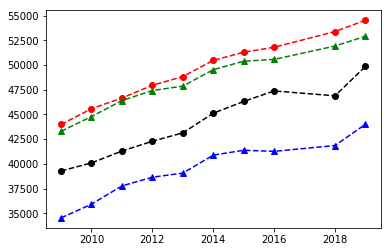

In [29]:
# Line graph, salary over 2009-2019 by industry 


goods = avg_byYear.loc[avg_byYear['Industry'] == "Goods-producing", "Annual Average Pay"]

natural_resources = avg_byYear.loc[avg_byYear['Industry'] == "Natural resources and mining", "Annual Average Pay"]

construction = avg_byYear.loc[avg_byYear['Industry'] == "Construction", "Annual Average Pay"]
manufacturing = avg_byYear.loc[avg_byYear['Industry'] == "Manufacturing", "Annual Average Pay"]
service = avg_byYear.loc[avg_byYear['Industry'] == "Service-providing", "Annual Average Pay"]
trade_transportation_utilities = avg_byYear.loc[avg_byYear['Industry'] == "Trade, transportation, and utilites", "Annual Average Pay"]
information = avg_byYear.loc[avg_byYear['Industry'] == "Information", "Annual Average Pay"]
finance = avg_byYear.loc[avg_byYear['Industry'] == "Financial activities", "Annual Average Pay"]
business = avg_byYear.loc[avg_byYear['Industry'] == "Professional and business services", "Annual Average Pay"]
education_health = avg_byYear.loc[avg_byYear['Industry'] == "Education and health services ", "Annual Average Pay"]
leisure = avg_byYear.loc[avg_byYear['Industry'] == "Leisure and hospitality", "Annual Average Pay"]
other = avg_byYear.loc[avg_byYear['Industry'] == "Other services", "Annual Average Pay"]
unclassified = avg_byYear.loc[avg_byYear['Industry'] == "Unclassified", "Annual Average Pay"]

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019]

# #plt.plot(years, avg_byYear.loc["Goods-producing", ["2009","2010","2011","2012","2013, 2014, 2015, 2016, 2017, 2018"]], 
# #                        color="green",label=avg_byYear.loc["Goods-producing","Industry"])

plt.plot(years, goods, label= "Goods-producing", marker= "o", color= "red", linestyle='--')
plt.plot(years, natural_resources, label= "Natural resources and mining", marker= "^", color= "blue", linestyle='--')
plt.plot(years, construction, label= "Construction", marker= "o", color= "black", linestyle='--')
plt.plot(years, manufacturing, label= "Manufacturing", marker= "^", color= "green", linestyle='--')

plt.show()


#

NameError: name 'goods' is not defined